In [58]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing  
import warnings # For handling error messages.

In [59]:
# import cleaned credit card "test" dataset csv     cc_classify_out_test.csv    cc_classify_out_train.csv
cc_classify_test_EDA = pd.read_csv('C:\\Users\\\Robert\\.spyder-py3\\raw_data\\cc_classify_out_train.csv')
#
df = cc_classify_test_EDA

In [60]:
# view imported dataset
df.head(10)

,Unnamed: 0,ID,Customer_ID,Month,Name,SSN,Occupation,Age,fn_Age,Annual_Income,...,Amount_invested_monthly,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score,Credit_Score_Number
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,23,23.0,19114.12,...,80.415295,High_spent_Small_value_payments,0,1,1,0,0,312.494089,Good,3
1,4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,23,23.0,19114.12,...,41.420153,High_spent_Medium_value_payments,0,1,0,1,0,341.489231,Good,3
2,6,0x1608,CUS_0xd40,July,Aaron Maashoh,821-00-0265,Scientist,23,23.0,19114.12,...,178.344067,Low_spent_Small_value_payments,1,0,1,0,0,244.565317,Good,3
3,7,0x1609,CUS_0xd40,August,NaN,#F%$D@*&8,Scientist,23,23.0,19114.12,...,24.785217,High_spent_Medium_value_payments,0,1,0,1,0,358.124168,Standard,2
4,9,0x160f,CUS_0x21b1,February,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,40.391238,High_spent_Large_value_payments,0,1,0,0,1,484.591214,Good,3
5,12,0x1612,CUS_0x21b1,May,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,130.115420,Low_spent_Small_value_payments,1,0,1,0,0,444.867032,Good,3
6,13,0x1613,CUS_0x21b1,June,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,43.477190,High_spent_Large_value_payments,0,1,0,0,1,481.505262,Good,3
7,15,0x1615,CUS_0x21b1,August,Rick Rothackerj,004-07-5839,Teacher,28,28.0,34847.84,...,218.904344,Low_spent_Small_value_payments,1,0,1,0,0,356.078109,Good,3
8,16,0x161a,CUS_0x2dbc,January,Langep,486-85-3974,_______,34,34.0,143162.64,...,168.413703,NaN,0,0,0,0,0,1043.315978,Good,3
9,17,0x161b,CUS_0x2dbc,February,NaN,486-85-3974,Engineer,34,34.0,143162.64,...,232.860384,High_spent_Small_value_payments,0,1,1,0,0,998.869297,Good,3


In [61]:
# drop columns:  Customer_ID, Name, SSN, Age  <keeping ID for now>
df.drop([ 'Customer_ID', 'Name', 'SSN', 'Age'], inplace=True, axis=1)

In [62]:
# view results of drop
df.head(15)

,Unnamed: 0,ID,Month,Occupation,fn_Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,fn_IRate,...,Amount_invested_monthly,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score,Credit_Score_Number
0,0,0x1602,January,Scientist,23.0,19114.12,1824.843333,3,4,3.0,...,80.415295,High_spent_Small_value_payments,0,1,1,0,0,312.494089,Good,3
1,4,0x1606,May,Scientist,23.0,19114.12,1824.843333,3,4,3.0,...,41.420153,High_spent_Medium_value_payments,0,1,0,1,0,341.489231,Good,3
2,6,0x1608,July,Scientist,23.0,19114.12,1824.843333,3,4,3.0,...,178.344067,Low_spent_Small_value_payments,1,0,1,0,0,244.565317,Good,3
3,7,0x1609,August,Scientist,23.0,19114.12,1824.843333,3,4,3.0,...,24.785217,High_spent_Medium_value_payments,0,1,0,1,0,358.124168,Standard,2
4,9,0x160f,February,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,40.391238,High_spent_Large_value_payments,0,1,0,0,1,484.591214,Good,3
5,12,0x1612,May,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,130.115420,Low_spent_Small_value_payments,1,0,1,0,0,444.867032,Good,3
6,13,0x1613,June,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,43.477190,High_spent_Large_value_payments,0,1,0,0,1,481.505262,Good,3
7,15,0x1615,August,Teacher,28.0,34847.84,3037.986667,2,4,6.0,...,218.904344,Low_spent_Small_value_payments,1,0,1,0,0,356.078109,Good,3
8,16,0x161a,January,_______,34.0,143162.64,12187.220000,1,5,8.0,...,168.413703,NaN,0,0,0,0,0,1043.315978,Good,3
9,17,0x161b,February,Engineer,34.0,143162.64,12187.220000,1,5,8.0,...,232.860384,High_spent_Small_value_payments,0,1,1,0,0,998.869297,Good,3


In [63]:
# view `select_dtypes` method to select columns of dtype 'object'
df.select_dtypes(include=['object'])

,ID,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0x1602,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,0x1606,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
2,0x1608,July,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
3,0x1609,August,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Standard
4,0x160f,February,Teacher,Credit-Builder Loan,Good,No,High_spent_Large_value_payments,Good
...,...,...,...,...,...,...,...,...
75073,0x25fe8,March,Mechanic,"Auto Loan, and Student Loan",NaN,No,High_spent_Medium_value_payments,Poor
75074,0x25fe9,April,Mechanic,"Auto Loan, and Student Loan",NaN,No,High_spent_Large_value_payments,Poor
75075,0x25fea,May,Mechanic,"Auto Loan, and Student Loan",NaN,No,High_spent_Medium_value_payments,Poor
75076,0x25feb,June,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor


In [64]:
#Use cc_classify_data's `select_dtypes` method to select columns of dtype 'int64','float64'
df.select_dtypes(include=['int64','float64'])

,Unnamed: 0,fn_Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,fn_IRate,Num_of_Loan,Num_of_Delayed_Payment,Delay_from_due_date,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score_Number
0,0,23.0,19114.12,1824.843333,3,4,3.00,4.0,7.0,3,...,26.822620,49.574949,80.415295,0,1,1,0,0,312.494089,3
1,4,23.0,19114.12,1824.843333,3,4,3.00,4.0,NaN,6,...,24.797347,49.574949,41.420153,0,1,0,1,0,341.489231,3
2,6,23.0,19114.12,1824.843333,3,4,3.00,4.0,8.0,3,...,22.537593,49.574949,178.344067,1,0,1,0,0,244.565317,3
3,7,23.0,19114.12,1824.843333,3,4,3.00,4.0,6.0,3,...,23.933795,49.574949,24.785217,0,1,0,1,0,358.124168,2
4,9,28.0,34847.84,3037.986667,2,4,6.00,1.0,1.0,7,...,38.550848,18.816215,40.391238,0,1,0,0,1,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75073,99994,25.0,39628.99,3359.415833,4,6,7.00,2.0,6.0,20,...,39.323569,35.104023,140.581403,0,1,0,1,0,410.256158,1
75074,99995,25.0,39628.99,3359.415833,4,6,7.00,2.0,7.0,23,...,34.663572,35.104023,60.971333,0,1,0,0,1,479.866228,1
75075,99996,25.0,39628.99,3359.415833,4,6,7.00,2.0,7.0,18,...,40.565631,35.104023,54.185950,0,1,0,1,0,496.651610,1
75076,99997,25.0,39628.99,3359.415833,4,6,14.56,2.0,6.0,27,...,41.255522,35.104023,24.028477,0,1,0,0,1,516.809083,1


In [65]:
# view output of sample of rows x columns
df.info

<bound method DataFrame.info of        Unnamed: 0       ID     Month Occupation  fn_Age  Annual_Income  \
0               0   0x1602   January  Scientist    23.0       19114.12   
1               4   0x1606       May  Scientist    23.0       19114.12   
2               6   0x1608      July  Scientist    23.0       19114.12   
3               7   0x1609    August  Scientist    23.0       19114.12   
4               9   0x160f  February    Teacher    28.0       34847.84   
...           ...      ...       ...        ...     ...            ...   
75073       99994  0x25fe8     March   Mechanic    25.0       39628.99   
75074       99995  0x25fe9     April   Mechanic    25.0       39628.99   
75075       99996  0x25fea       May   Mechanic    25.0       39628.99   
75076       99997  0x25feb      June   Mechanic    25.0       39628.99   
75077       99998  0x25fec      July   Mechanic    25.0       39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  fn_IRate  \
0

In [66]:
# view data types of the columns
df.dtypes

Unnamed: 0                    int64
ID                           object
Month                        object
Occupation                   object
fn_Age                      float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
fn_IRate                    float64
Num_of_Loan                 float64
Num_of_Delayed_Payment      float64
Delay_from_due_date           int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
fn_Credit_History_Age       float64
Type_of_Loan                 object
Loan_Type_Total_Count         int64
Auto_Loan_Count             float64
Credit_Builder_Count        float64
Debt_Consolidation_Count    float64
Home_Equity_Loan_Count      float64
Mortgage_Count              float64
Not_Specified_Count         float64
Payday_Count                float64
Personal_Loan_Count         float64
Credit_Mix                   object
Outstanding_Debt            

In [67]:
# Call the .corr() method on the credit card test dataset dataset to view matrix of correlations
df.corr()

,Unnamed: 0,fn_Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,fn_IRate,Num_of_Loan,Num_of_Delayed_Payment,Delay_from_due_date,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance,Credit_Score_Number
Unnamed: 0,1.000000,0.002761,0.001666,-0.004320,0.003820,-0.007858,0.006115,-0.010485,0.005685,-0.001927,...,-0.004883,-0.000105,0.003845,0.003191,-0.003537,-0.003708,-0.001942,0.005935,0.001409,0.007213
fn_Age,0.002761,1.000000,0.005657,0.090979,-0.001171,-0.006665,-0.213854,-0.203704,-0.000346,-0.173667,...,0.026143,0.001178,0.008863,-0.020132,0.020586,-0.030061,0.011728,0.021454,0.114979,0.163286
Annual_Income,0.001666,0.005657,1.000000,0.029743,-0.004947,0.002817,-0.004957,-0.002910,-0.001541,-0.009192,...,0.009740,-0.002173,-0.004144,-0.002903,0.002930,-0.010940,0.002741,0.009362,0.017416,0.008557
Monthly_Inhand_Salary,-0.004320,0.090979,0.029743,1.000000,-0.010793,-0.004919,-0.297622,-0.243130,-0.000738,-0.249969,...,0.171131,0.006436,0.057678,-0.218784,0.222158,-0.244977,0.095789,0.173489,0.656843,0.208290
Num_Bank_Accounts,0.003820,-0.001171,-0.004947,-0.010793,1.000000,-0.000777,0.016646,0.013280,-0.002489,0.016107,...,-0.002435,0.000523,0.003598,-0.000068,-0.001145,0.002262,-0.001981,-0.001803,-0.010605,-0.011492
Num_Credit_Card,-0.007858,-0.006665,0.002817,-0.004919,-0.000777,1.000000,0.008187,0.006046,0.002270,0.008636,...,-0.003484,0.001113,-0.001671,0.003715,-0.003435,0.003426,0.000081,-0.003583,-0.006885,-0.007595
fn_IRate,0.006115,-0.213854,-0.004957,-0.297622,0.016646,0.008187,1.000000,0.532507,0.013675,0.583674,...,-0.074812,-0.002084,-0.018175,0.068844,-0.070615,0.076854,-0.023607,-0.062252,-0.315562,-0.477994
Num_of_Loan,-0.010485,-0.203704,-0.002910,-0.243130,0.013280,0.006046,0.532507,1.000000,0.012636,0.479579,...,-0.093478,0.001289,-0.016355,0.057258,-0.061239,0.066759,-0.023843,-0.053307,-0.418521,-0.342111
Num_of_Delayed_Payment,0.005685,-0.000346,-0.001541,-0.000738,-0.002489,0.002270,0.013675,0.012636,1.000000,0.011755,...,-0.002601,0.000831,0.001055,0.001009,0.000882,-0.000474,-0.004744,0.007892,-0.005671,-0.006719
Delay_from_due_date,-0.001927,-0.173667,-0.009192,-0.249969,0.016107,0.008636,0.583674,0.479579,0.011755,1.000000,...,-0.061279,-0.002545,-0.013334,0.058779,-0.059472,0.063519,-0.020638,-0.049310,-0.272625,-0.428825


In [74]:
#                    Annual_Income Monthly_Inhand_Salary  Monthly_Balance      Loan_Type_Total_Count
df['Loan_Type_Total_Count'].describe() # Occupation fn_Age Name Num_of_Delayed_Payment     Credit_Score_Number

count    75078.000000
mean         3.537694
std          2.443808
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Loan_Type_Total_Count, dtype: float64

In [75]:
#                                                    Credit_Score_Number
df['Loan_Type_Total_Count'].value_counts()

3    11912
2    11816
4    11639
0     8454
1     8350
6     6053
7     5778
5     5649
9     2904
8     2523
Name: Loan_Type_Total_Count, dtype: int64

In [51]:
# view missing data
# Type_of_Loan has 4289 recs with "NA"; filter out and re-run
df.isna().sum()

Unnamed: 0                     0
ID                             0
Month                          0
Occupation                     0
fn_Age                      1095
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
fn_IRate                       0
Num_of_Loan                    0
Num_of_Delayed_Payment      2626
Delay_from_due_date            0
Changed_Credit_Limit         800
Num_Credit_Inquiries         785
fn_Credit_History_Age       3358
Type_of_Loan                4289
Loan_Type_Total_Count          0
Auto_Loan_Count             4289
Credit_Builder_Count        4289
Debt_Consolidation_Count    4289
Home_Equity_Loan_Count      4289
Mortgage_Count              4289
Not_Specified_Count         4289
Payday_Count                4289
Personal_Loan_Count         4289
Credit_Mix                  7378
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_

In [52]:
# filter for rows with "NA"
df_na = df[df['Type_of_Loan'] == 'NA']
print(df_na)          # returns Empty df  [0 rows x 39 columns]

Empty DataFrame
Columns: [Unnamed: 0, ID, Month, Occupation, fn_Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, fn_IRate, Num_of_Loan, Num_of_Delayed_Payment, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, fn_Credit_History_Age, Type_of_Loan, Loan_Type_Total_Count, Auto_Loan_Count, Credit_Builder_Count, Debt_Consolidation_Count, Home_Equity_Loan_Count, Mortgage_Count, Not_Specified_Count, Payday_Count, Personal_Loan_Count, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Is_Low_Spent, Is_High_Spent, Is_Small_PMT, Is_Medium_PMT, Is_Large_PMT, Monthly_Balance]
Index: []

[0 rows x 39 columns]


In [53]:
# filter out rows with "NA"
df = df[df['Type_of_Loan'] != 'NA']

In [56]:
df_na.head(50)

,Unnamed: 0,ID,Month,Occupation,fn_Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,fn_IRate,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance


In [92]:
# re-view missing data after 4289 recs of Type_of_Loan with "NA" filtered out
df.isna().sum()

Unnamed: 0                      0
ID                              0
Month                           0
Occupation                      0
fn_Age                       2152
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
fn_IRate                        0
Num_of_Loan                     0
Num_of_Delayed_Payment       5242
Delay_from_due_date             0
Changed_Credit_Limit         1579
Num_Credit_Inquiries         1477
fn_Credit_History_Age        6794
Type_of_Loan                 8454
Loan_Type_Total_Count           0
Auto_Loan_Count              8454
Credit_Builder_Count         8454
Debt_Consolidation_Count     8454
Home_Equity_Loan_Count       8454
Mortgage_Count               8454
Not_Specified_Count          8454
Payday_Count                 8454
Personal_Loan_Count          8454
Credit_Mix                  15200
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min

In [57]:
df.head(50)

,Unnamed: 0,ID,Month,Occupation,fn_Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,fn_IRate,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Is_Low_Spent,Is_High_Spent,Is_Small_PMT,Is_Medium_PMT,Is_Large_PMT,Monthly_Balance
0,0,0x160a,September,Scientist,23.0,19114.120,1824.843333,3,4,3.00,...,No,49.574949,236.642682,Low_spent_Small_value_payments,1,0,1,0,0,186.266702
1,1,0x160b,October,Scientist,24.0,19114.120,1824.843333,3,4,3.00,...,No,49.574949,21.465380,High_spent_Medium_value_payments,0,1,0,1,0,361.444004
2,2,0x160c,November,Scientist,24.0,19114.120,1824.843333,3,4,3.00,...,No,49.574949,148.233938,Low_spent_Medium_value_payments,1,0,0,1,0,264.675446
3,4,0x1616,September,_______,28.0,34847.840,3037.986667,2,4,6.00,...,No,18.816215,39.684018,High_spent_Large_value_payments,0,1,0,0,1,485.298434
4,5,0x1617,October,Teacher,28.0,34847.840,3037.986667,2,4,6.00,...,No,18.816215,251.627369,Low_spent_Large_value_payments,1,0,0,0,1,303.355083
5,6,0x1618,November,Teacher,28.0,34847.840,3037.986667,2,4,6.00,...,No,18.816215,72.680145,High_spent_Large_value_payments,0,1,0,0,1,452.302307
6,7,0x1619,December,Teacher,28.0,34847.840,3037.986667,2,4,6.00,...,No,18.816215,153.534488,NaN,0,0,0,0,0,421.447964
7,9,0x1623,October,Engineer,35.0,143162.640,12187.220000,1,5,8.00,...,No,246.992319,453.615131,Low_spent_Large_value_payments,1,0,0,0,1,788.114550
8,10,0x1624,November,Engineer,35.0,143162.640,12187.220000,1,5,8.00,...,No,246.992319,841.232236,Low_spent_Medium_value_payments,1,0,0,1,0,410.497445
9,11,0x1625,December,Engineer,35.0,143162.640,12187.220000,1,5,8.00,...,No,246.992319,506.307780,High_spent_Medium_value_payments,0,1,0,1,0,715.421901


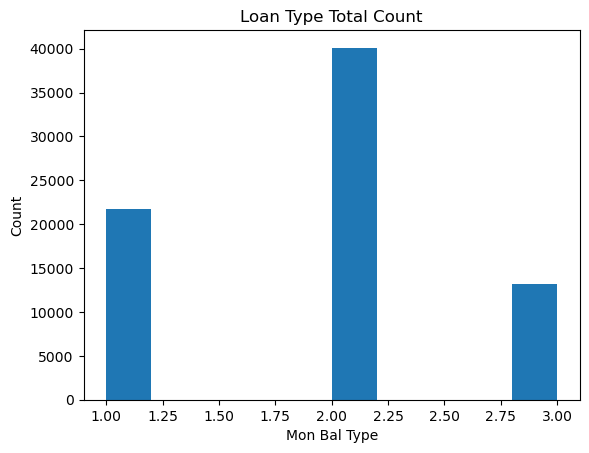

In [85]:
# Create histogram       Monthly_Balance   Loan Type Total Count
plt.hist(df['Credit_Score_Number'])   
# Add a title 
plt.title("Loan Type Total Count")   
# Add X and Y axis labels 
plt.xlabel("Mon Bal Type") 
plt.ylabel("Count")   
# Show graphic 
plt.show()

In [139]:
#  Tested:       Annual_Income               Loan_Type_Total_Count       Credit_Score_Number    Monthly_Balance
from scipy.stats import normaltest
data = list(df['Annual_Income'])

# perform normality test
statistic, p_value = normaltest(data)
print(statistic, p_value)
# print results
if p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

128880.69631034698 0.0
The data is not normally distributed.


In [140]:
# Filter the dataframe for rows where Credit_Score')['Annual_Income are different,
print(df.groupby('Credit_Score')['Annual_Income'].agg(['count', 'mean', 'std', 'min', 'max']))

              count           mean           std      min         max
Credit_Score                                                         
Good          13233  190595.480190  1.451329e+06  7189.54  24198062.0
Poor          21730  157702.551627  1.386941e+06  7005.93  23912939.0
Standard      40115  189733.042609  1.495577e+06  7006.52  24188807.0


In [95]:
#group that by 'state' and perform `value_counts` on the 'Region'
print(df.groupby('Credit_Score')['Annual_Income'].value_counts())

Credit_Score  Annual_Income
Good          1.356677e+04     8
              1.420886e+04     8
              1.560425e+04     8
              2.120682e+04     8
              3.201994e+04     8
                              ..
Standard      2.409698e+07     1
              2.410537e+07     1
              2.416001e+07     1
              2.417715e+07     1
              2.418881e+07     1
Name: Annual_Income, Length: 19820, dtype: int64


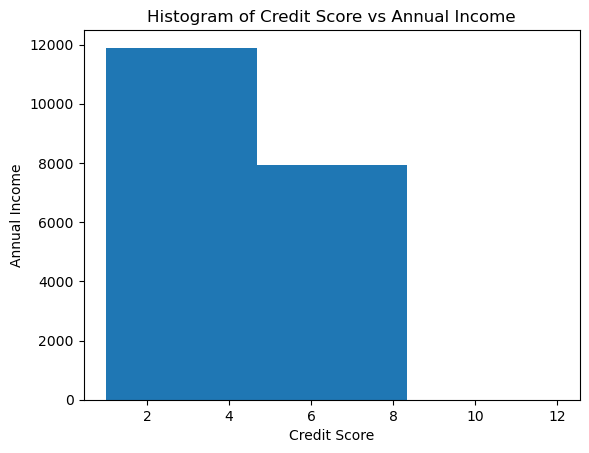

In [97]:
plt.hist(df.groupby('Credit_Score_Number')['Annual_Income'].value_counts(), bins=3)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.title('Histogram of Credit Score vs Annual Income')
plt.show()

In [101]:
np.median(df['Num_Bank_Accounts'])

# one time clean up
for index, row in df.iterrows():
    if row['Num_Bank_Accounts'] >= 11:
        df.loc[index,'Num_Bank_Accounts'] = np.median(df['Num_Bank_Accounts'])   

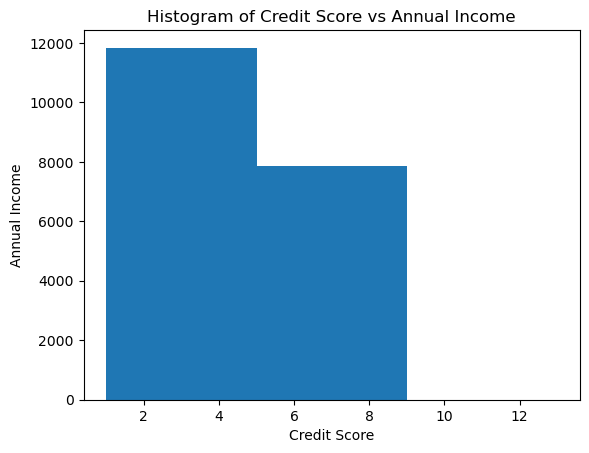

In [113]:
#
plt.hist(df.groupby('Credit_Score_Number')['Monthly_Inhand_Salary'].value_counts(), bins=3)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.title('Histogram of Credit Score vs Annual Income')
plt.show()

In [127]:
# Aggregate the data for Credit_Score by Monthly_Balance 
# This seems counter intuitive: Good credit score paired with higher Monthly_Balance
print(df.groupby('Credit_Score')['Monthly_Balance'].agg(['count', 'mean', 'std', 'min', 'max']))

              count        mean         std      min          max
Credit_Score                                                     
Good          13233  467.514244  250.603580  0.00776  1567.208309
Poor          21730  341.483667  176.814518  0.01000  1602.040519
Standard      40115  403.774341  214.597479  0.01000  1564.134826


In [110]:
# Aggregate the data for rows Credit_Score by Monthly_Inhand_Salary
print(df.groupby('Credit_Score')['Monthly_Inhand_Salary'].agg(['count', 'mean', 'std', 'min', 'max']))

              count         mean          std         min           max
Credit_Score                                                           
Good          13233  5389.341246  3674.464477  332.128333  15204.633333
Poor          21730  3381.873324  2665.685760  319.556250  15167.180000
Standard      40115  4238.932433  3128.791254  303.645417  15204.633333


In [111]:
# Create new feature Mon_Bal_By_Mon_Salary' = ( 'Monthly_Balance'/df'Monthly_Inhand_Salary )
df['Mon_Bal_By_Mon_Salary'] = df['Monthly_Balance']/df['Monthly_Inhand_Salary']

# Aggregate the data for rows Credit_Score by Monthly_Inhand_Salary
print(df.groupby('Credit_Score')['Mon_Bal_By_Mon_Salary'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std           min       max
Credit_Score                                                   
Good          13233  0.120284  0.073133  6.731319e-07  0.822747
Poor          21730  0.157485  0.115626  6.615861e-07  0.852991
Standard      40115  0.139609  0.094603  6.606461e-07  0.876487


In [112]:
# Aggregate the data for rows Credit_Score by fn_IRate
# The differences are dramatic: Good credit = 7.8, Standard = 13.78, Poor=20.86
print(df.groupby('Credit_Score')['fn_IRate'].agg(['count', 'mean', 'std', 'min', 'max']))

              count       mean       std  min   max
Credit_Score                                       
Good          13233   7.824762  4.923458  1.0  34.0
Poor          21730  20.060289  8.798298  1.0  34.0
Standard      40115  13.785606  7.610564  1.0  34.0


In [114]:
# Aggregate the data for rows Credit_Score by Annual_Income
print(df.groupby('Credit_Score')['Annual_Income'].agg(['count', 'mean', 'std', 'min', 'max']))

              count           mean           std      min         max
Credit_Score                                                         
Good          13233  190595.480190  1.451329e+06  7189.54  24198062.0
Poor          21730  157702.551627  1.386941e+06  7005.93  23912939.0
Standard      40115  189733.042609  1.495577e+06  7006.52  24188807.0


In [115]:
# Aggregate the data for rows Credit_Score by Credit_Utilization_Ratio
print(df.groupby('Credit_Score')['Credit_Utilization_Ratio'].agg(['count', 'mean', 'std', 'min', 'max']))

              count       mean       std        min        max
Credit_Score                                                  
Good          13233  32.664342  5.229515  20.257073  49.522324
Poor          21730  32.010815  5.043623  20.985606  48.489852
Standard      40115  32.321308  5.097030  20.000000  50.000000


In [116]:
# Aggregate the data for rows Credit_Score by Num_Credit_Card
print(df.groupby('Credit_Score')['Num_Credit_Card'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          13233  4.199123  1.812398    0   10
Poor          21730  6.609526  1.968805    1   16
Standard      40115  5.426025  1.847661    0   18


In [117]:
# Aggregate the data for rows Credit_Score by Num_Bank_Accounts
print(df.groupby('Credit_Score')['Num_Bank_Accounts'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          13233  3.484093  2.220584   -1   10
Poor          21730  6.518776  2.492853   -1   10
Standard      40115  5.385018  2.354106   -1   10


In [118]:
# Aggregate the data for rows Credit_Score by Loan_Type_Total_Count
# the differences here are dramatic:  Poor has much larger mean for loan count
print(df.groupby('Credit_Score')['Loan_Type_Total_Count'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          13233  2.208267  1.649814    0    9
Poor          21730  4.747354  2.435310    0    9
Standard      40115  3.320977  2.375803    0    9


In [122]:
# Aggregate the data for rows Credit_Score by Amount_invested_monthly
# the differences here are dramatic:  Good has much larger mean
print(df.groupby('Credit_Score')['Amount_invested_monthly'].agg(['count', 'mean', 'std', 'min', 'max']))

              count        mean         std  min          max
Credit_Score                                                 
Good          13233  238.224206  257.065630  0.0  1903.080048
Poor          21730  151.767878  148.248602  0.0  1944.520747
Standard      40115  184.053256  190.366552  0.0  1977.326102


In [123]:
# Aggregate the data for rows Credit_Score by Outstanding_Debt
# the differences here are dramatic: Good has much smaller mean
print(df.groupby('Credit_Score')['Outstanding_Debt'].agg(['count', 'mean', 'std', 'min', 'max']))

              count         mean          std   min      max
Credit_Score                                                
Good          13233   802.255249   615.150473  0.23  4998.07
Poor          21730  2082.167128  1144.771710  0.54  4997.10
Standard      40115  1278.209192  1133.193275  0.23  4998.07


In [136]:
from sklearn.linear_model import LogisticRegression

# Load data
data = df #pd.read_csv('credit_data.csv')

# Split data into features (X) and labels (y)
X = data[[ 'Credit_Score_Number',  'fn_IRate']]  #  , 'fn_IRate'
y = data['Credit_Score'] #  'classification'

# Create logistic regression model 
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate accuracy of model
score = model.score(X, y)
print('Model accuracy:', score)
#X = data[[ 'Outstanding_Debt', 'Loan_Type_Total_Count', 'fn_IRate']]
#y = data['Credit_Score']    Model accuracy: 0.5841524814193239
# X = data[[ 'Outstanding_Debt', 'Loan_Type_Total_Count', 'Monthly_Inhand_Salary', 'fn_IRate']]
# y = data['Credit_Score']   Model accuracy: 0.5583526465808892
# X = data[[  'Loan_Type_Total_Count', 'fn_IRate']]
# y = data['Credit_Score']  Model accuracy: 0.5887210634273689
# X = data[[ 'Credit_Score_Number',  'fn_IRate']]  #  , 'fn_IRate'
# y = data['Credit_Score'] #  Model accuracy: 1.0 confirming what I suspected

Model accuracy: 1.0


In [130]:
# Aggregate the data for rows Credit_Score by Total_EMI_per_month
# Not much difference among Good, Poor, Standard
print(df.groupby('Credit_Score')['Total_EMI_per_month'].agg(['count', 'mean', 'std', 'min', 'max']))

              count         mean          std  min      max
Credit_Score                                               
Good          13233  1476.562484  8450.021653  0.0  82236.0
Poor          21730  1376.620418  8199.564539  0.0  81971.0
Standard      40115  1373.291245  8220.851644  0.0  82193.0


In [138]:
# Aggregate the data for rows Credit_Score by Pay day loans
# Large difference among Good and Poor when looking at Pay day loans
print(df.groupby('Credit_Score')['Payday_Count'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          10716  0.313550  0.550101  0.0  4.0
Poor          20742  0.576994  0.767969  0.0  5.0
Standard      35166  0.431212  0.664706  0.0  5.0


In [141]:
# Aggregate the data for rows Credit_Score by Mortgage Loans
# not sure how to interpret this one
print(df.groupby('Credit_Score')['Mortgage_Count'].agg(['count', 'mean', 'std', 'min', 'max']))

              count      mean       std  min  max
Credit_Score                                     
Good          10716  0.310844  0.539402  0.0  3.0
Poor          20742  0.549706  0.728790  0.0  5.0
Standard      35166  0.418785  0.652758  0.0  5.0


In [142]:
# Aggregate the data for rows Credit_Score by fn_Credit_History_Age
# Large difference in the number of mean months between Good and Poor credit scores
print(df.groupby('Credit_Score')['fn_Credit_History_Age'].agg(['count', 'mean', 'std', 'min', 'max']))

              count        mean        std  min    max
Credit_Score                                          
Good          12047  284.527766  73.644150  6.0  404.0
Poor          19733  170.091572  87.182782  1.0  404.0
Standard      36504  227.880205  99.351092  2.0  404.0


In [150]:
#import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import pandas as pd

#load data
data = pd.read_csv("C:\\Users\\\Robert\\.spyder-py3\\raw_data\\archive\\cc_classify_decision_tree.csv")
# drop all records with NaN values
data = data.dropna()

#split data into features and target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#create decision tree model
model = DecisionTreeClassifier()

#train model
model.fit(X_train, y_train)

#predict using model
y_pred = model.predict(X_test)

#evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: {}%".format(accuracy*100))
# Model accuracy: 69.10675381263617%
#print(X_train)
#print(DecisionTreeClassifier.feature_importances_)
print(y_test, y_pred)

Model accuracy: 68.75816993464052%
1977     3
10185    1
2945     1
12225    3
6572     2
        ..
4989     3
60       2
9257     3
9255     3
4765     2
Name: Credit_Score_Number, Length: 2295, dtype: int64 [2 2 1 ... 3 3 2]


In [151]:
# From dataframe script a list that returns all columns that are numeric
# Create a list to store the numeric columns
numeric_columns = []

# Iterate through each column in the dataframe
for col in df.columns:
  # Check if the column is numeric
  if df[col].dtypes in ['int64', 'float64']:
    # If it is, add it to the list
    numeric_columns.append(col)

# Print the list of numeric columns
print(numeric_columns)

['Unnamed: 0', 'fn_Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'fn_IRate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'fn_Credit_History_Age', 'Loan_Type_Total_Count', 'Auto_Loan_Count', 'Credit_Builder_Count', 'Debt_Consolidation_Count', 'Home_Equity_Loan_Count', 'Mortgage_Count', 'Not_Specified_Count', 'Payday_Count', 'Personal_Loan_Count', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Is_Low_Spent', 'Is_High_Spent', 'Is_Small_PMT', 'Is_Medium_PMT', 'Is_Large_PMT', 'Monthly_Balance', 'Credit_Score_Number', 'Mon_Bal_By_Mon_Salary']


In [153]:
# For loop to check if each numeric column is normally distributed
for col in numeric_columns:
  # Use the normaltest to check for normality
  stat, p = normaltest(df[col])
  # Print the results of the test
  print(f'{col} has a p-value of {p}')
  # Check if the p-value is less than 0.05
  if p < 0.05:
    # Print the column is not normally distributed
    print(f'{col} is not normally distributed')
  else:
    # Print the column is normally distributed
    print(f'{col} is normally distributed')

Unnamed: 0 has a p-value of 0.0
Unnamed: 0 is not normally distributed
fn_Age has a p-value of nan
fn_Age is normally distributed
Annual_Income has a p-value of 0.0
Annual_Income is not normally distributed
Monthly_Inhand_Salary has a p-value of 0.0
Monthly_Inhand_Salary is not normally distributed
Num_Bank_Accounts has a p-value of 0.0
Num_Bank_Accounts is not normally distributed
Num_Credit_Card has a p-value of 1.2004200174382313e-173
Num_Credit_Card is not normally distributed
fn_IRate has a p-value of 0.0
fn_IRate is not normally distributed
Num_of_Loan has a p-value of 0.0
Num_of_Loan is not normally distributed
Num_of_Delayed_Payment has a p-value of nan
Num_of_Delayed_Payment is normally distributed
Delay_from_due_date has a p-value of 0.0
Delay_from_due_date is not normally distributed
Changed_Credit_Limit has a p-value of nan
Changed_Credit_Limit is normally distributed
Num_Credit_Inquiries has a p-value of nan
Num_Credit_Inquiries is normally distributed
fn_Credit_History_Ag